# Perceptron

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [7]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [10]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

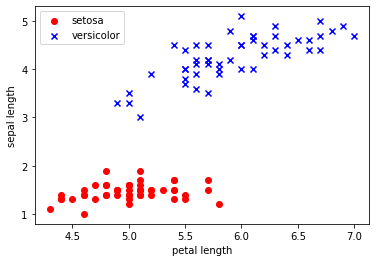

In [12]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

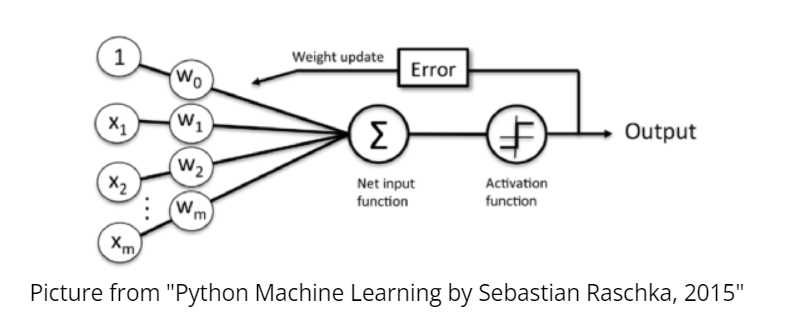

In [38]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

0.9393433500278241

# Code own perceptron

In [18]:
from typing import List
Vector = List[float]

In [19]:
def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [20]:
def step_function(x: float) -> float:
    return 1.0 if x >= 0 else 0.0

In [21]:
def perceptron_output(weights: Vector, bias: float, x: Vector) -> float:
    # returns 1 if the perceptron fires, 0 if not
    calculation = dot(weights, x) + bias
    return step_function(calculation)

#### AND gate

In [22]:
and_weights = [2., 2]
and_bias = -3

Returns 1 if both its inputs are 1 but returns 0 if one of its inputs is 0:

In [24]:
# 2 + 2 -3 = 1 -> 1
assert perceptron_output(and_weights, and_bias, [1, 1]) == 1

In [25]:
# 0 + 2 -3 = -1 -> 0
assert perceptron_output(and_weights, and_bias, [0, 1]) == 0

In [26]:
# 2 + 0 -3 = -1 -> 0
assert perceptron_output(and_weights, and_bias, [1, 0]) == 0

In [27]:
# 0 + 0 -3 = -3 -> 0
assert perceptron_output(and_weights, and_bias, [0, 0]) == 0

In [28]:
# error
assert perceptron_output(and_weights, and_bias, [1, 1]) == 0

AssertionError: 

In [29]:
# error
assert perceptron_output(and_weights, and_bias, [1, 0]) == 1

AssertionError: 

#### OR gate

In [30]:
or_weights = [2., 2]
or_bias = -1

In [31]:
# 2 + 2 -1 = 3 -> 1
assert perceptron_output(or_weights, or_bias, [1, 1]) == 1

In [32]:
# 0 + 2 -1 = 1 -> 1
assert perceptron_output(or_weights, or_bias, [0, 1]) == 1

In [33]:
# 2 + 0 -1 = 1 -> 1
assert perceptron_output(or_weights, or_bias, [1, 0]) == 1

In [34]:
# 0 + 0 -1 = -1 -> 0
assert perceptron_output(or_weights, or_bias, [0, 0]) == 0

#### NOT gate

In [35]:
not_weights = [-2.]
not_bias = 1

Has one input and converts 1 to 0 and 0 to 1:

In [36]:
# 0 +1 = 1 -> 1
assert perceptron_output(not_weights, not_bias, [0]) == 1

In [37]:
# -2 +1 = -1 -> 0
assert perceptron_output(not_weights, not_bias, [1]) == 0